# Making required libraries download

In [ ]:
#pip install pyldavis

# Importing the libraires

In [12]:
import numpy as np
import pandas as pd
import spacy
import nltk

pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
import string
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package punkt to C:\Users\ARU
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ARU
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ARU PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to C:\Users\ARU
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


# Downloading required nltk packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\ARU
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ARU
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Downloading dataset

In [4]:
df = pd.read_csv('chunk4.csv')

In [5]:
#df = pd.read_csv('/content/chunk4.csv')
#url='https://drive.google.com/file/d/1BhGhwcCkJQPnEGFzvGnbn2t6GC3o6t1J/view?usp=drive_link'
#url='https://drive.google.com/uc?id=' + url.split('/')[-2]
#df = pd.read_csv(url)
df = df.head(100)

In [6]:
df.isnull().sum()

article    0
summary    0
dtype: int64

# Converting article and summary columns to lower case, as NLP models are case sensitive.

In [7]:
df1_lower = df.copy()
df1_lower[['article','summary']] = df[['article','summary']].applymap(lambda x: x.lower())
df1_lower.head()

,article,summary
0,"by . emma reynolds . published: . 03:22 est, 4...",patrick lanzo horrified the community with a s...
1,by . james chapman . david cameron has ordered...,exclusive: senior tories examining plan to for...
2,"by . john hall . published: . 04:27 est, 4 feb...",coding-error redirects thousands of nhs users ...
3,by . daily mail reporter . published: . 01:50 ...,"city éclair, a bakery in new york's little ita..."
4,(cnn) -- when former los angeles police office...,some 50 families had to be protected during th...


# Preparing Text Data for Exploratory Data Analysis (EDA)

**Stopwords removal**

In [8]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df1_lower['lemmatized_article']=df1_lower['article'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df1_lower['lemmatized_asummary']=df1_lower['summary'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df1_lower

,article,summary,lemmatized_article,lemmatized_asummary
0,"by . emma reynolds . published: . 03:22 est, 4...",patrick lanzo horrified the community with a s...,". emma reynolds . publish : . 03:22 est , 4 20...",patrick lanzo horrify community similar sign b...
1,by . james chapman . david cameron has ordered...,exclusive: senior tories examining plan to for...,. james chapman . david cameron order tory pub...,exclusive : senior tory examine plan form gove...
2,"by . john hall . published: . 04:27 est, 4 feb...",coding-error redirects thousands of nhs users ...,". john hall . publish : . 04:27 est , 4 februa...",code - error redirect thousand nhs user fraudu...
3,by . daily mail reporter . published: . 01:50 ...,"city éclair, a bakery in new york's little ita...",. daily mail reporter . publish : . 01:50 est ...,"city éclair , bakery new york little italy , a..."
4,(cnn) -- when former los angeles police office...,some 50 families had to be protected during th...,( cnn ) -- los angeles police officer christop...,50 family protect manhunt christopher dorner ....
...,...,...,...,...
95,"by . william turvill . published: . 04:44 est,...","wayne kinvig, from burnley, lancashire, preyed...",". william turvill . publish : . 04:44 est , 3 ...","wayne kinvig , burnley , lancashire , prey vic..."
96,by . wills robinson and ryan gorman . publishe...,orien hamilton died after being taken to hospi...,. will robinson ryan gorman . publish : . 20:5...,orien hamilton die take hospital severe head i...
97,by . chris parsons . last updated at 6:05 pm o...,miss greening claimed for two journeys across ...,. chris parson . update 6:05 pm 2nd march 2012...,miss greening claim journey south london behal...
98,(cnn)kayla mueller was difficult to reach -- 6...,u.s. troops made a rescue effort in july but d...,"( cnn)kayla mueller difficult reach -- 6,000 m...",u.s . troop rescue effort july find mueller ho...


# Features Extraction

In [9]:
#helper funtion to count the number of stopwords
def count_stopwords(text, stopwords):
    """
    Count the number of stopwords in a given text.

    Args:
        text (str): The input text to analyze.
        stopwords (list): A list of stopwords.

    Returns:
        int: The count of stopwords in the text.
    """
    word_tokens = word_tokenize(text)
    stop_words = [word for word in word_tokens if word in stopwords]
    return len(stop_words)


In [10]:
#helper function to split a text into sentences
def split_sentences(text):
    """
    Split a text into sentences using NLTK's sentence tokenizer.

    Args:
        text (str): The input text to split.

    Returns:
        list: A list of sentences in the text.
    """
    sentences = nltk.sent_tokenize(text)
    return sentences

In [13]:
# define stopwords and punctuation
stopwords = stopwords.words('english')
punc = string.punctuation

# Count the number of sentences in 'article' and 'summary' columns
df1_lower['article_sentence_count'] = df1_lower['article'].apply(lambda x: len(split_sentences(x)))
df1_lower['summary_sentence_count'] = df1_lower['summary'].apply(lambda x: len(split_sentences(x)))

# Count the number of words in 'article' and 'summary' columns
df1_lower['article_word_count'] = df1_lower['article'].apply(lambda x: len(x.split()))
df1_lower['summary_word_count'] = df1_lower['summary'].apply(lambda x: len(x.split()))

# Count the number of characters (excluding spaces) in 'article' and 'summary' columns
df1_lower['article_char_count'] = df1_lower['article'].apply(lambda x: len(x.replace(" ", "")))
df1_lower['summary_char_count'] = df1_lower['summary'].apply(lambda x: len(x.replace(" ", "")))

# Calculate word density (words per character) in 'article' and 'summary' columns
df1_lower['article_word_density'] = df1_lower['article_word_count'] / (df1_lower['article_char_count'] + 1)
df1_lower['summary_word_density'] = df1_lower['summary_word_count'] / (df1_lower['summary_char_count'] + 1)

# Calculate sentence density (sentences per word) in 'article' and 'summary' columns
df1_lower['article_sentence_density'] = df1_lower['article_sentence_count'] / (df1_lower['article_word_count'] + 1)
df1_lower['summary_sentence_density'] = df1_lower['summary_sentence_count'] / (df1_lower['summary_word_count'] + 1)

# Count the number of punctuation marks in 'article' and 'summary' columns
df1_lower['article_punctuation_count'] = df1_lower['article'].apply(lambda x: len([a for a in x if a in punc]))
df1_lower['summary_punctuation_count'] = df1_lower['summary'].apply(lambda x: len([a for a in x if a in punc]))

# Count the number of stopwords in 'article' and 'summary' columns
df1_lower['article_stopwords_count'] = df1_lower['article'].apply(lambda x: count_stopwords(x, stopwords))
df1_lower['summary_stopwords_count'] = df1_lower['summary'].apply(lambda x: count_stopwords(x, stopwords))

# Calculate stopwords density (stopwords per word) in 'article' and 'summary' columns
df1_lower['article_stopwords_density'] = df1_lower['article_stopwords_count'] / (df1_lower['article_word_count'] + 1)
df1_lower['summary_stopwords_density'] = df1_lower['summary_stopwords_count'] / (df1_lower['summary_word_count'] + 1)

df1_lower.head()

,article,summary,lemmatized_article,lemmatized_asummary,article_sentence_count,summary_sentence_count,article_word_count,summary_word_count,article_char_count,summary_char_count,article_word_density,summary_word_density,article_sentence_density,summary_sentence_density,article_punctuation_count,summary_punctuation_count,article_stopwords_count,summary_stopwords_count,article_stopwords_density,summary_stopwords_density
0,"by . emma reynolds . published: . 03:22 est, 4...",patrick lanzo horrified the community with a s...,". emma reynolds . publish : . 03:22 est , 4 20...",patrick lanzo horrify community similar sign b...,42,2,518,35,2495,170,0.207532,0.204678,0.080925,0.055556,148,4,204,12,0.393064,0.333333
1,by . james chapman . david cameron has ordered...,exclusive: senior tories examining plan to for...,. james chapman . david cameron order tory pub...,exclusive : senior tory examine plan form gove...,34,5,895,70,4509,309,0.198448,0.225806,0.037946,0.070423,86,7,379,20,0.422991,0.281690
2,"by . john hall . published: . 04:27 est, 4 feb...",coding-error redirects thousands of nhs users ...,". john hall . publish : . 04:27 est , 4 februa...",code - error redirect thousand nhs user fraudu...,23,3,476,31,2434,184,0.195483,0.167568,0.048218,0.093750,70,4,192,9,0.402516,0.281250
3,by . daily mail reporter . published: . 01:50 ...,"city éclair, a bakery in new york's little ita...",. daily mail reporter . publish : . 01:50 est ...,"city éclair , bakery new york little italy , a...",24,3,331,58,1554,297,0.212862,0.194631,0.072289,0.050847,82,12,126,16,0.379518,0.271186
4,(cnn) -- when former los angeles police office...,some 50 families had to be protected during th...,( cnn ) -- los angeles police officer christop...,50 family protect manhunt christopher dorner ....,28,3,577,39,2805,182,0.205631,0.213115,0.048443,0.075000,84,5,254,17,0.439446,0.425000


## Analyze Feature Distributions on the article variable

In [15]:
# Select columns related to article
article_columns = df1_lower[['article_sentence_count', 'article_word_count', 'article_char_count',
                             'article_word_density', 'article_sentence_density',
                             'article_punctuation_count', 'article_stopwords_count']]

# descriptive statistics for the article columns
article_columns.describe()

,article_sentence_count,article_word_count,article_char_count,article_word_density,article_sentence_density,article_punctuation_count,article_stopwords_count
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,35.420000,642.260000,3100.720000,0.207153,0.055458,109.420000,264.160000
std,20.131477,308.750058,1476.882555,0.010555,0.015312,57.190481,144.459335
min,6.000000,163.000000,747.000000,0.182190,0.032258,36.000000,50.000000
25%,23.000000,395.000000,1932.250000,0.200106,0.045316,66.750000,166.000000
50%,28.000000,578.000000,2818.500000,0.207020,0.053396,96.000000,221.500000
75%,46.250000,820.500000,3830.500000,0.214016,0.062257,139.500000,328.500000
max,116.000000,1700.000000,7480.000000,0.230077,0.122093,349.000000,890.000000


In [16]:
# create helper functions to draw box plot and histograms
def plot_box_plots(data, columns, num_rows=2, num_cols=3):
    """
    Plot box plots for specified columns from a DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing the columns to plot.
        columns (list): List of column names to create box plots for.
        num_rows (int): Number of rows for the subplot grid (default is 2).
        num_cols (int): Number of columns for the subplot grid (default is 3).

    Returns:
        None
    """

    # Calculate the total number of plots needed
    total_plots = num_rows * num_cols

    # Create a subplot grid to accommodate the specified number of columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))
    axes = axes.flatten()

    # Plot box plots for each column in the specified list
    for i, col in enumerate(columns):
        if i < total_plots:
            ax = axes[i]
            ax.boxplot(data[col], vert=True)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")

    # Hide any remaining empty subplots (if there are fewer columns than total_plots)
    for i in range(len(columns), total_plots):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def plot_histograms(data, num_rows=None, num_cols=None):
    """
    Plot histograms for each column in the DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing columns to plot.
        num_rows (int): Number of rows for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.
        num_cols (int): Number of columns for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.

    Returns:
        None
    """
    # Get the column names from the DataFrame
    columns = data.columns

    # Calculate the number of rows and columns for the subplots
    if num_rows is None and num_cols is None:
        num_rows = int(len(columns) ** 0.5)
        num_cols = (len(columns) + num_rows - 1) // num_rows
    elif num_rows is None:
        num_rows = (len(columns) + num_cols - 1) // num_cols
    elif num_cols is None:
        num_cols = (len(columns) + num_rows - 1) // num_rows

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))

    # Flatten the axes array to easily iterate over each subplot
    axes = axes.flatten()

    # Plot histograms for each column on the corresponding subplot
    for i, col in enumerate(columns):
        if i < len(columns):
            ax = axes[i]
            ax.hist(data[col], bins=100)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")

    # Hide any remaining empty subplots
    for i in range(len(columns), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


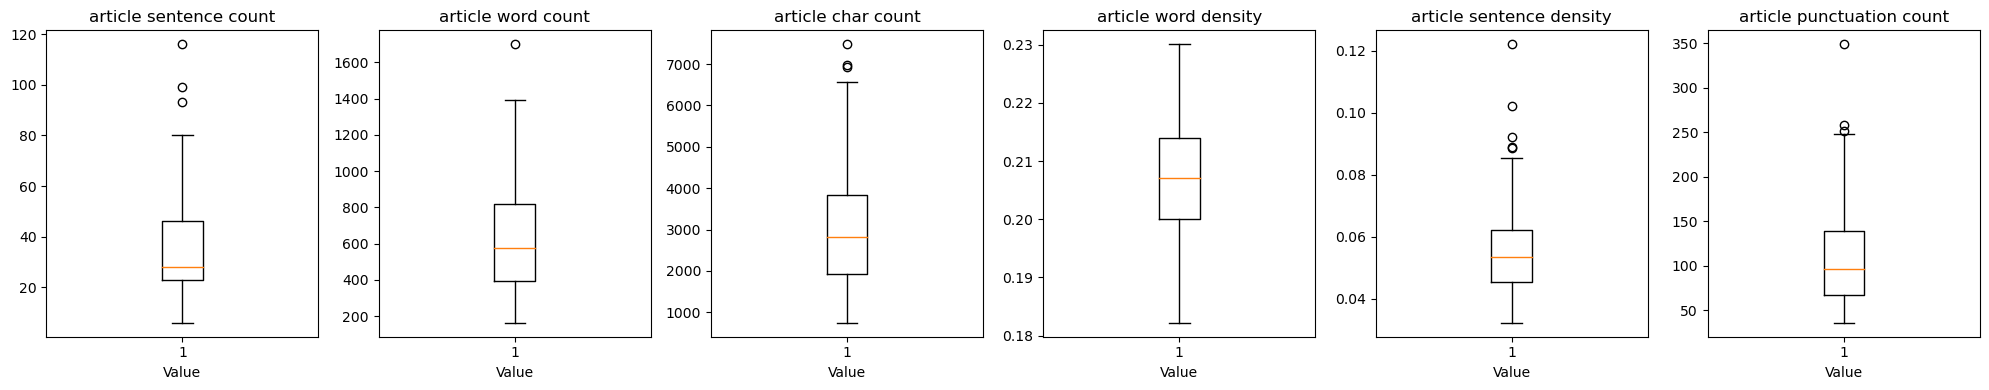

In [17]:
# select article related columns
article_columns_to_plot= ['article_sentence_count', 'article_word_count', 'article_char_count','article_word_density',
                          'article_sentence_density', 'article_punctuation_count', 'article_stopwords_count']
# box plot
plot_box_plots(df1_lower, article_columns_to_plot, num_rows=1, num_cols=6)

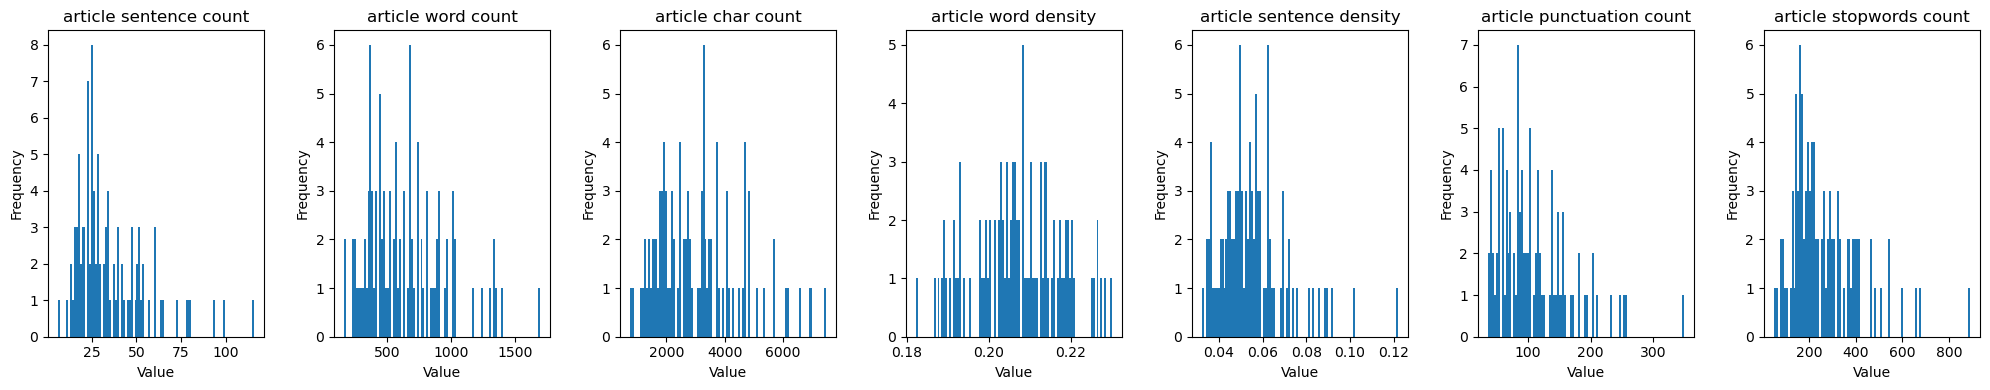

In [18]:
# plot histograms for the article columns
plot_histograms(article_columns, num_rows=1, num_cols=7)

## Analyzing text statistics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


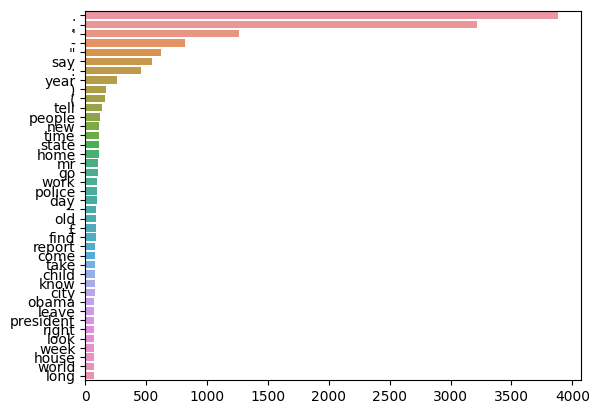

In [30]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df1_lower['lemmatized_article'])

# Topic modeling exploration with pyLDAvis

In [31]:
# Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))


    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
lda_model, bow_corpus, dic = get_lda_objects(df1_lower['summary'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
lda_model.show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.006*"said" + 0.005*"new" + 0.005*"say" + 0.004*"home" + 0.004*"truman" + 0.003*"balotelli" + 0.003*"star" + 0.003*"tax" + 0.003*"four" + 0.003*"governor"'),
 (1,
  '0.010*"say" + 0.003*"people" + 0.003*"said" + 0.003*"report" + 0.003*"january" + 0.003*"free" + 0.003*"show" + 0.003*"state" + 0.003*"world" + 0.003*"also"'),
 (2,
  '0.011*"child" + 0.006*"say" + 0.005*"year" + 0.004*"come" + 0.004*"egg" + 0.004*"garrison" + 0.003*"also" + 0.003*"exam" + 0.003*"pornography" + 0.003*"case"'),
 (3,
  '0.008*"could" + 0.006*"day" + 0.004*"would" + 0.004*"found" + 0.003*"two" + 0.003*"woman" + 0.003*"one" + 0.003*"used" + 0.003*"andrea" + 0.003*"pool"')]

In [34]:
plot_lda_vis(lda_model, bow_corpus, dic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.091185 -0.044644       1        1  26.904617
0     -0.057231  0.092214       2        1  25.898338
3     -0.082996 -0.088469       3        1  23.779753
1      0.049042  0.040899       4        1  23.417293, topic_info=        Term       Freq      Total Category  logprob  loglift
244    child  13.000000  13.000000  Default  30.0000  30.0000
106      day   5.000000   5.000000  Default  29.0000  29.0000
599    could   8.000000   8.000000  Default  28.0000  28.0000
1835  truman   3.000000   3.000000  Default  27.0000  27.0000
535      egg   3.000000   3.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
244    child   1.944054  13.075610   Topic4  -5.9631  -0.4543
39      year   1.356245   8.704160   Topic4  -6.3232  -0.4074
378    would   1.348865   6.068945   Topic4  -6.3287  -0.0522
142    filed   1.348562   3.042671   Topic4  -6.3289   0.6380
262    house   1.348303   4.301562   Topic4  -6.3291   0.2916

[243 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
64        2  0.648917        100
64        3  0.324459        100
1726      2  0.538429       abby
618       1  0.645158     action
618       4  0.322579     action
...     ...       ...        ...
378       4  0.164773      would
39        1  0.574438       year
39        2  0.344663       year
39        4  0.114888       year
2031      4  0.552259  zimmerman

[319 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

## Polarisation of articles

**Creating seperate column alligned to polarity of article and summary**

In [35]:
from textblob import TextBlob
df1_lower['polarity_article']=df1_lower['lemmatized_article'].apply(lambda x:TextBlob(x).sentiment.polarity)
df1_lower['polarity_summary']=df1_lower['lemmatized_asummary'].apply(lambda x:TextBlob(x).sentiment.polarity)
df1_lower

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article,summary,lemmatized_article,lemmatized_asummary,polarity_article,polarity_summary
0,by . jonathan petre . and jo knowsley . warnin...,education secretary michael gove warned about ...,. jonathan petre . jo knowsley . warn : michae...,education secretary michael gove warn ' dumbe ...,0.115561,0.300000
1,an austrian girl has said she feels she 'can r...,sabina selimovic spoke via text message to par...,austrian girl say feel ' free ' radical - call...,sabina selimovic speak text message paris matc...,0.142555,0.000000
2,british muslims are being urged to wear a new ...,£22 headscarf is backed by muslim groups as a ...,british muslims urge wear new ' poppy hijab ' ...,£ 22 headscarf back muslim group symbol rememb...,0.040761,0.000000
3,by . associated press reporter . officials say...,a woman's body was found on mount rainer sunda...,. associate press reporter . official search p...,woman body find mount rainer sunday general ar...,0.082845,0.041667
4,"more issues in ferguson: former ferguson, miss...","jaris hayden, 29, will be arraigned december 3...","issue ferguson : ferguson , missouri correctio...","jaris hayden , 29 , arraign december 3 crimina...",0.061695,-0.033333
...,...,...,...,...,...,...
95,"by . amanda williams . published: . 07:41 est,...",ms pitt had right-sided hemiplegic cerebral pa...,". amanda williams . publish : . 07:41 est , 4 ...",ms pitt right - sided hemiplegic cerebral pals...,0.085277,0.361905
96,(cnn) -- like a viper that slithers through th...,charles garcia: a judge ruled that children of...,( cnn ) -- like viper slither garden -- unseen...,charles garcia : judge rule child immigrant fl...,0.007537,0.033333
97,washington (cnn) -- a 5-year-old's birthday pa...,white house report says stimulus bill achieved...,washington ( cnn ) -- 5 - year - old birthday ...,white house report say stimulus bill achieve g...,0.086057,-0.200000
98,by . chris pleasance for mailonline . two men ...,two men arrested in south africa after man pe...,. chris pleasance mailonline . man south afric...,man arrest south africa man pelt death orang...,-0.065192,-0.050000


**Listing some of the most positive and negative articles**

In [36]:
print("3 Random articles with Highest Polarity:")
for index,review in enumerate(df1_lower.iloc[df1_lower['polarity_summary'].sort_values(ascending=False)[:3].index]['summary']):
  print('Summary {}:\n'.format(index+1),review)

3 Random articles with Highest Polarity:
Summary 1:
 gregory allnutt bought tax-free goods from eu .
he then sold them without vat to undercut rivals .
raked in £4,000 a month for three years .
now owes £420,000 in vat to the taxman .
Summary 2:
 anna chakvetadze returns to wta action in hobart in january .
former world no.5 collapsed on court while playing caroline wozniacki in dubai .
chakvetadze made unsuccessful bid to win election to russia's duma .
alex corretja named captain of spain's davis cup team .
Summary 3:
 twitter has improved tools for reporting abuse .
easier mobile reporting among is among the changes .
the move comes after wave of gamergate harassment .


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Plotting plortiy of articles**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


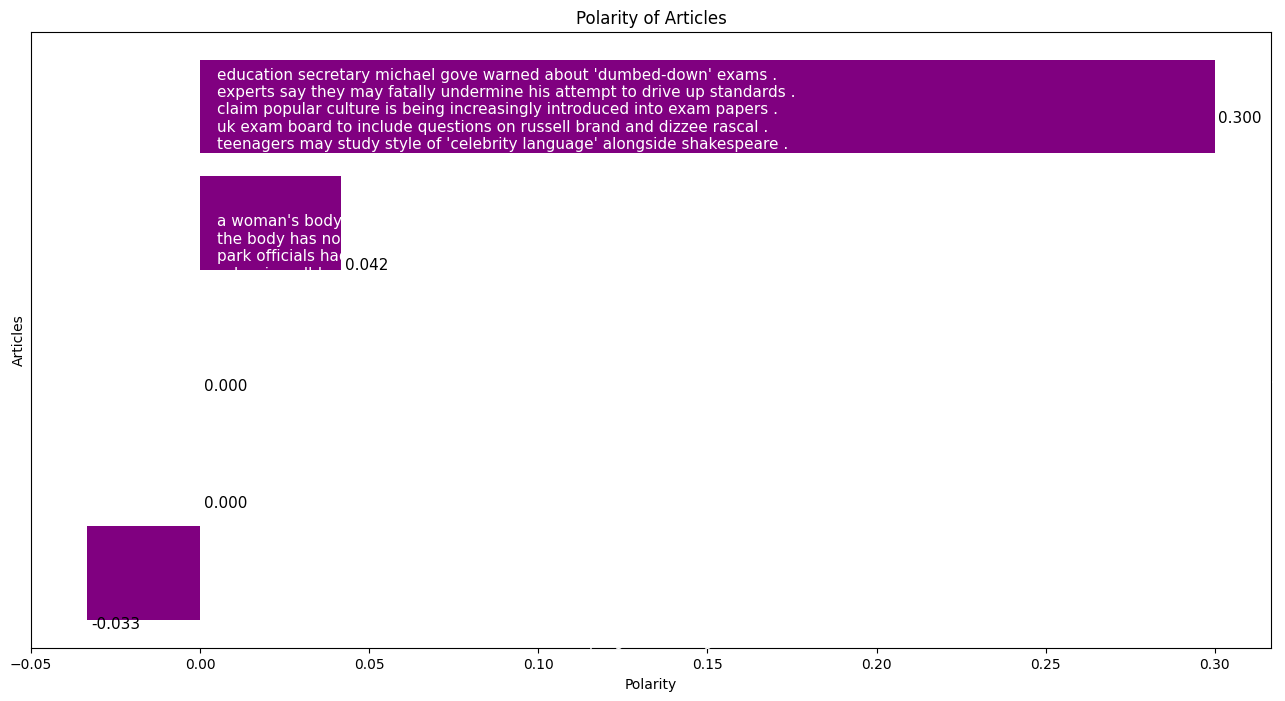

In [37]:
import matplotlib.pyplot as plt

product_polarity_sorted=pd.DataFrame(df1_lower.head().groupby('summary')['polarity_summary'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Articles')
plt.title('Polarity of Articles')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity_summary'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph

for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity_summary']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

## Categorizing and Part-of-Speech (POS) tagging words
- tagging each word as a noun, determiner, adjetive, adverb etc. and analyze its distribution

In [20]:
# hepler function to perform POS tags
def get_pos_tags(sentences, tagset='universal'):
    """
    Get the part-of-speech (POS) tags for a list of sentences.

    Args:
        sentences (list): A list of sentences to be POS tagged.
        tagset (str): The tagset to use for POS tagging (default is 'universal').

    Returns:
        DataFrame: A DataFrame containing the count of each POS tag for each sentence.
                  Columns are in the order: 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN',
                  'NUM', 'PRT', 'PRON', 'VERB', '.', 'X'.
    """
    pos_tags_list = []
    for sent in sentences:
        # Tokenize the sentence into words and get the POS tags using nltk.pos_tag
        pos_tags = Counter([j for i, j in nltk.pos_tag(word_tokenize(sent), tagset=tagset)])
        pos_tags_list.append(pos_tags)

    # Create the DataFrame directly from the list of dictionaries
    df = pd.DataFrame(pos_tags_list).fillna(0).astype(int)

    # Reorder the columns to match the desired order
    df = df[['ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRT', 'PRON', 'VERB', '.']]

    return df

# Identify the POS taggings for the 'article' variable
article = df1_lower['article'].values
df_article = get_pos_tags(article)

# Identify the POS taggings for the 'summary' variable
summary = df1_lower['summary'].values
df_summary = get_pos_tags(summary)


In [21]:
# Examine POS descriptive statistics on the article df
df_article.describe()

,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,59.660000,76.660000,28.420000,19.530000,65.580000,194.810000,17.440000,25.850000,34.580000,123.360000,82.140000
std,28.998161,37.911172,20.450571,12.255244,33.422964,89.786469,17.723647,14.987116,29.536206,67.273979,42.081455
min,17.000000,19.000000,2.000000,3.000000,15.000000,47.000000,0.000000,3.000000,2.000000,24.000000,27.000000
25%,36.000000,46.750000,15.750000,11.000000,42.000000,124.500000,8.000000,16.000000,16.750000,78.000000,50.500000
50%,56.500000,73.500000,25.000000,16.500000,55.500000,181.000000,13.500000,22.500000,29.000000,103.500000,75.000000
75%,74.250000,100.500000,33.000000,24.500000,82.000000,242.500000,21.000000,34.000000,42.250000,160.000000,108.500000
max,151.000000,199.000000,144.000000,64.000000,187.000000,432.000000,154.000000,102.000000,176.000000,385.000000,261.000000


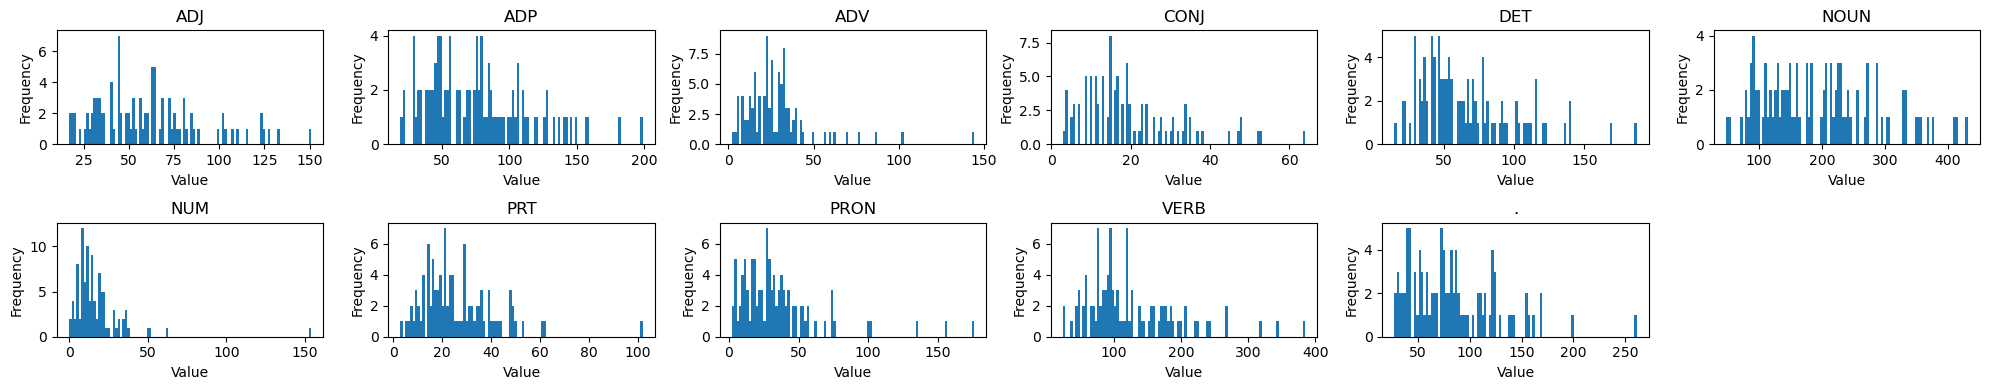

In [22]:
# Analyze POS tag distribution on the acrticle df
plot_histograms(df_article, num_rows=2, num_cols=6)

## Check for Unknown Words, Symbols, Characters, and Special Characters


In [23]:
#Check for Unknown Words(names, surnames, locations or misspelled words)
def get_unique_unknown_words(tokenize_text, vocab):
    unknown_words = {word for word in tokenize_text if word.lower() not in vocab}
    return unknown_words

# Download the pre-trained GloVe word vectors
glove_vectors = api.load('glove-wiki-gigaword-100')

# Get the vocabulary of the GloVe embeddings
glove_vocab = set(glove_vectors.key_to_index.keys())

# Get unique unknown words in 'article' column
df1_lower['unknown_words_article'] = df1_lower['article'].apply(lambda x: get_unique_unknown_words(x, glove_vocab))

# Get unique unknown words in 'summary' column
df1_lower['unknown_words_summary'] = df1_lower['summary'].apply(lambda x: get_unique_unknown_words(x, glove_vocab))

# Print the unique unknown words in 'article' column
print("Unique unknown words in 'article' column:")
print(set.union(*df1_lower['unknown_words_article']))

# Print the unique unknown words in 'summary' column
print("Unique unknown words in 'summary' column:")
print(set.union(*df1_lower['unknown_words_summary']))

[==================================================] 100.0% 128.1/128.1MB downloaded
Unique unknown words in 'article' column:
{'°', '©', ' ', '\xa0'}
Unique unknown words in 'summary' column:
{'\n', '°', ' ', '\xa0'}


## Topic Modelling
- Topic modeling is a natural language processing technique used to discover latent patterns or topics within a collection of documents. It is an unsupervised learning approach that aims to identify groups of words (topics) that frequently occur together in the documents, providing insights into the main themes or subjects discussed in the text corpus.

In [24]:
# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

# Apply the count vectorized method to the data
tf = tf_vectorizer.fit_transform(df1_lower['article'])

# Build the Document Term Matrix
tf_feature_names = tf_vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))

# Perform Topic Modeling using Latent Dirichlet Allocation (LDA)
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(tf)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
print_top_words(lda_model, tf_feature_names, n_top_words)

Topic 1:
he, his, said, had, as, him, by, with, after, from

Topic 2:
her, she, had, with, as, at, said, but, when, after

Topic 3:
said, from, were, with, be, cnn, at, an, are, people

Topic 4:
by, at, with, as, has, from, were, an, which, after

Topic 5:
are, we, as, they, with, have, at, this, you, be



## Visualising topic modelling

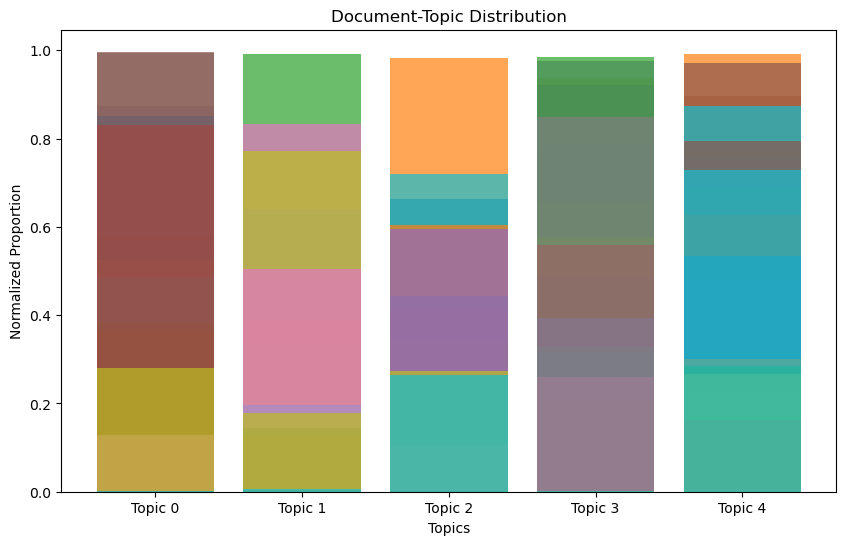

In [25]:
def plot_document_topic_distribution(model_output):
    # Normalize the document-topic distribution
    normalized_output = model_output / model_output.sum(axis=1)[:, np.newaxis]

    # Create a bar plot to visualize the document-topic distribution
    plt.figure(figsize=(10, 6))
    topics = [f'Topic {i}' for i in range(lda_model.n_components)]
    for i in range(normalized_output.shape[0]):
        plt.bar(topics, normalized_output[i], alpha=0.7)
    plt.xlabel('Topics')
    plt.ylabel('Normalized Proportion')
    plt.title('Document-Topic Distribution')
    plt.show()

# Visualize the document-topic distribution
plot_document_topic_distribution(lda_output)


C:\Users\ARU PC\AppData\Local\Temp\ipykernel_24856\3457986989.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_features)
C:\Users\ARU PC\AppData\Local\Temp\ipykernel_24856\3457986989.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_features)
C:\Users\ARU PC\AppData\Local\Temp\ipykernel_24856\3457986989.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_features)
C:\Users\ARU PC\AppData\Local\Temp\ipykernel_24856\3457986989.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_features)
C:\Users\ARU PC\AppData\Local\Temp\ipykernel_24856\3457986989.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_features)


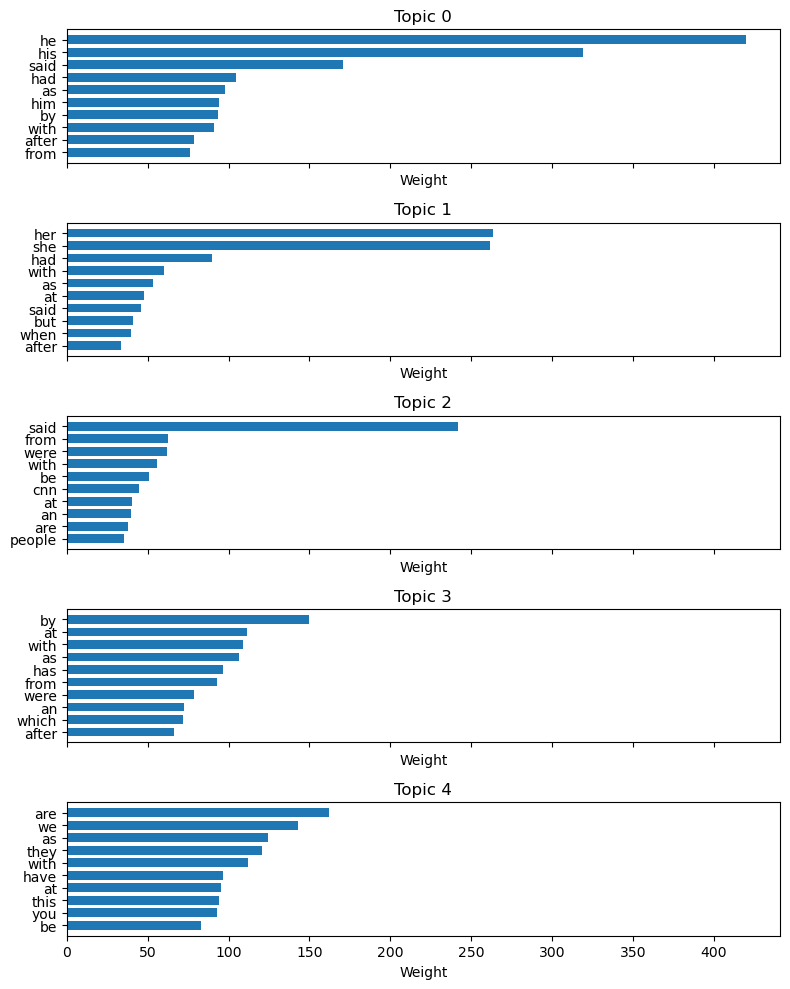

In [26]:
#Visualize the top words for each topic
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(nrows=model.n_components, ncols=1, figsize=(8, 2 * model.n_components),
                             sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_yticklabels(top_features)
        ax.invert_yaxis()
        ax.set_xlabel('Weight')
        ax.set_title(f'Topic {topic_idx}')
    plt.tight_layout()
    plt.show()

# Visualize the top words for each topic
n_top_words = 10
plot_top_words(lda_model, tf_feature_names, n_top_words)